In [32]:
import my_library.constants as constants
import ROOT
import my_library.gluex_style

In [33]:
ROOT.gStyle.SetOptStat(0)

In [34]:
monitoring_recon_filepath_pipkmks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root'
monitoring_recon_filepath_pimkpks = '/w/halld-scshelf2101/home/viducic/data/acceptance_study/pimkpks_s18_042050_042059_monitoring.root'

pipkmks_file = ROOT.TFile(monitoring_recon_filepath_pipkmks, 'READ')
pimkpks_file = ROOT.TFile(monitoring_recon_filepath_pimkpks, 'READ')

In [35]:
# got this from ChatGPT
# TODO: move this to library 
def explore_directory(directory, depth=0):
    indent = "  " * depth
    print(f"{indent}Directory: {directory.GetName()}")
    
    keys = directory.GetListOfKeys()
    for key in keys:
        obj = key.ReadObj()
        if isinstance(obj, ROOT.TDirectory):
            explore_directory(obj, depth + 1)
        else:
            print(f"{indent}  {obj.GetName()}")

for key in pipkmks_file.GetListOfKeys():
    obj = key.ReadObj()
    if isinstance(obj, ROOT.TDirectory):
        print(key)

for key in pimkpks_file.GetListOfKeys():
    obj = key.ReadObj()
    if isinstance(obj, ROOT.TDirectory):
        print(key)

Name: Independent Title: Independent
Name: pipkmks__ks_pippim__B4_M16 Title: pipkmks__ks_pippim__B4_M16
Name: Independent Title: Independent
Name: pimkpks__ks_pippim__B4_M16 Title: pimkpks__ks_pippim__B4_M16


In [36]:
directory_name_pipkmks = 'pipkmks__ks_pippim__B4_M16'
directory_name_pimkpks = 'pimkpks__ks_pippim__B4_M16'

directory_pipkmks = pipkmks_file.Get(directory_name_pipkmks)
directory_pimkpks = pimkpks_file.Get(directory_name_pimkpks)

In [37]:
longest = 0
for key_pip in directory_pimkpks.GetListOfKeys():
    if len(key_pip.GetName()) > longest:
        longest = len(key_pip.GetName())

for key_pip, key_pim in zip(directory_pipkmks.GetListOfKeys(), directory_pimkpks.GetListOfKeys()):
    spaces = " "*(longest-len(key_pip.GetName()))
    print(f'{key_pip.GetName()}{spaces}|| {key_pim.GetName()}')
    # print(f'{key_pip.GetName()}')

Hist_InvariantMass_KShort_PreKinFit             || Hist_InvariantMass_KShort_PreKinFit
Hist_MissingMassSquared_KShort_PreKinFit        || Hist_MissingMassSquared_KShort_PreKinFit
Hist_MissingMassSquared_PreKinFit               || Hist_MissingMassSquared_PreKinFit
Hist_KinFitResults                              || Hist_KinFitResults
Hist_PID                                        || Hist_PID
Hist_InvariantMass_KShort_PostKinFit            || Hist_InvariantMass_KShort_PostKinFit
Hist_MissingMassSquared_KShort_PostKinFit       || Hist_MissingMassSquared_KShort_PostKinFit
Hist_MissingMassSquared_PostKinFit              || Hist_MissingMassSquared_PostKinFit
Hist_InvariantMass_KShort_PostKinFit_KinFit     || Hist_InvariantMass_KShort_PostKinFit_KinFit
Hist_MissingMassSquared_KShort_PostKinFit_KinFit|| Hist_MissingMassSquared_KShort_PostKinFit_KinFit
Hist_ParticleComboKinematics                    || Hist_ParticleComboKinematics
NumParticleCombos                               || NumParticleCo

In [38]:
# hist_name = 'NumEventsSurvivedAction'
hist_name = 'ComboConstruction_NumEventsSurvived'
hist_pipkmks = directory_pipkmks.Get(hist_name)
hist_pimkpks = directory_pimkpks.Get(hist_name)
# ratio.GetLowerRefYaxis().SetTitle('ratio')

In [39]:
hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['blue']))
hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.TWELVE_COLORBLIND_HEX_DICT['red']))

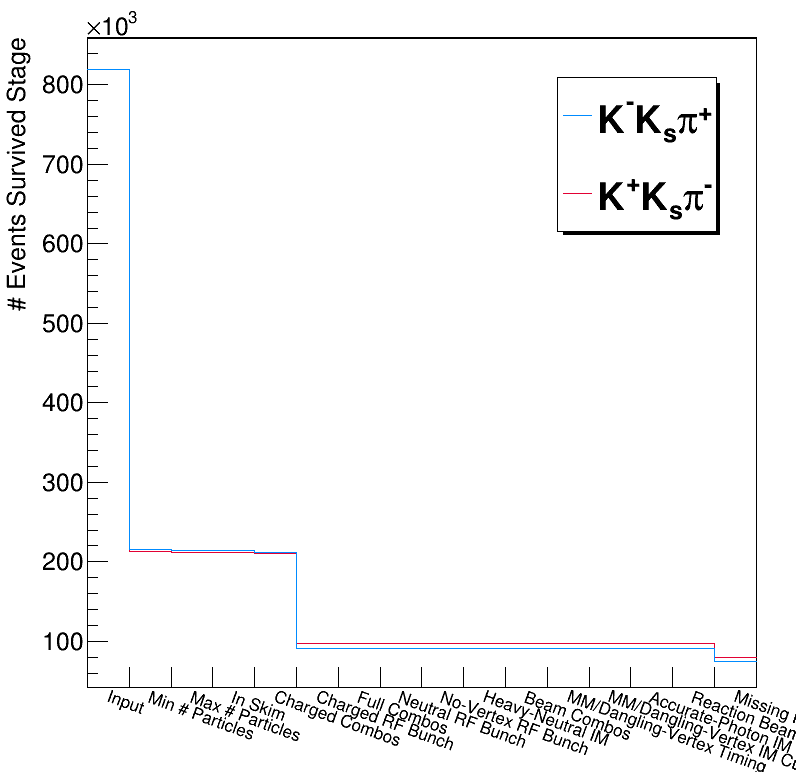

In [46]:
c = ROOT.TCanvas("c", "c", 800, 800)
hist_pimkpks.SetTitle("")
c.cd(1)
hist_pimkpks.Draw()
hist_pipkmks.Draw("same")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
legend.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
legend.Draw()
c.Draw()


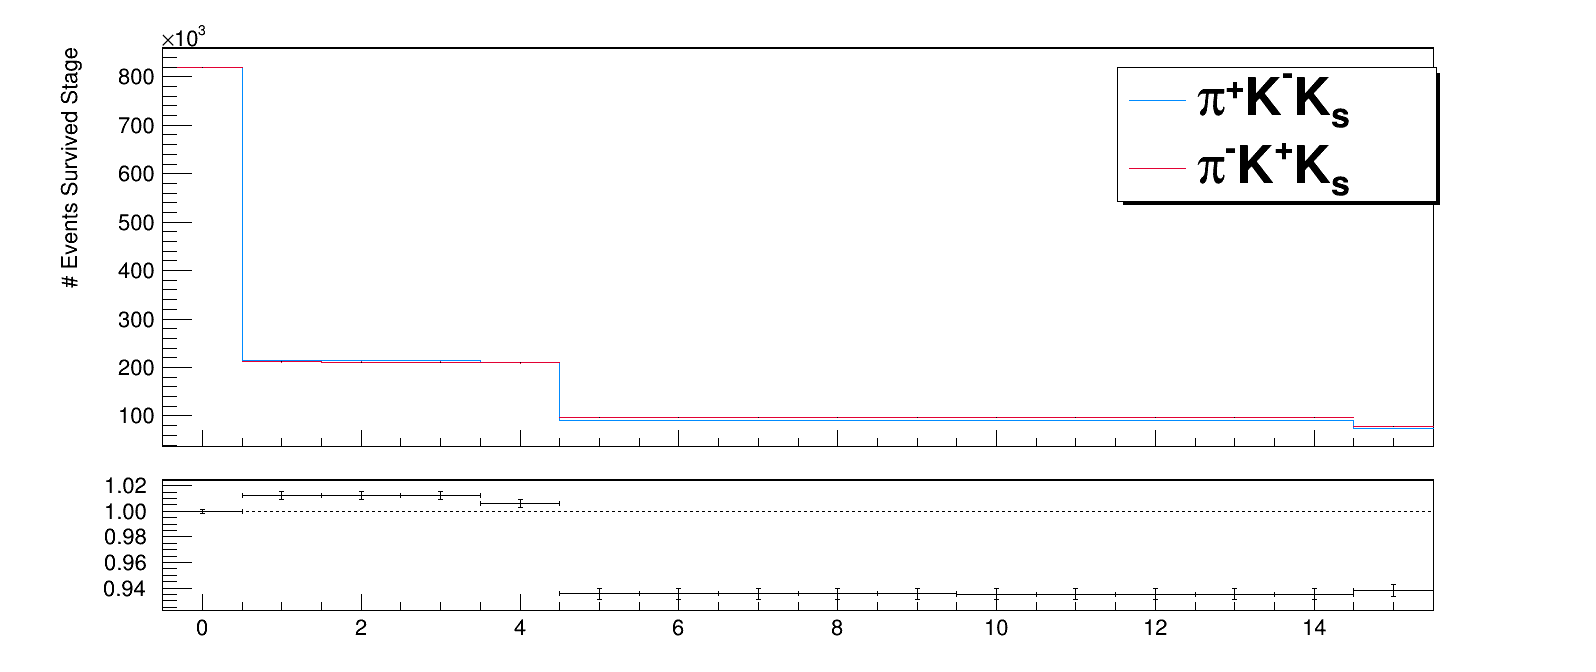

In [41]:
hist_pimkpks.SetTitle("Monitoring Histogram Comparison")
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(hist_pipkmks, "#pi^{+}K^{-}K_{s}", "l")
legend.AddEntry(hist_pimkpks, "#pi^{-}K^{+}K_{s}", "l")
c1 = ROOT.TCanvas("c1", "c1", 1600, 700)
ratio_plot = ROOT.TRatioPlot(hist_pipkmks, hist_pimkpks)
c1.cd()
# hist_pimkpks.Draw()
# hist_pipkmks.Draw("same")
ratio_plot.Draw()
legend.Draw()
c1.Draw()

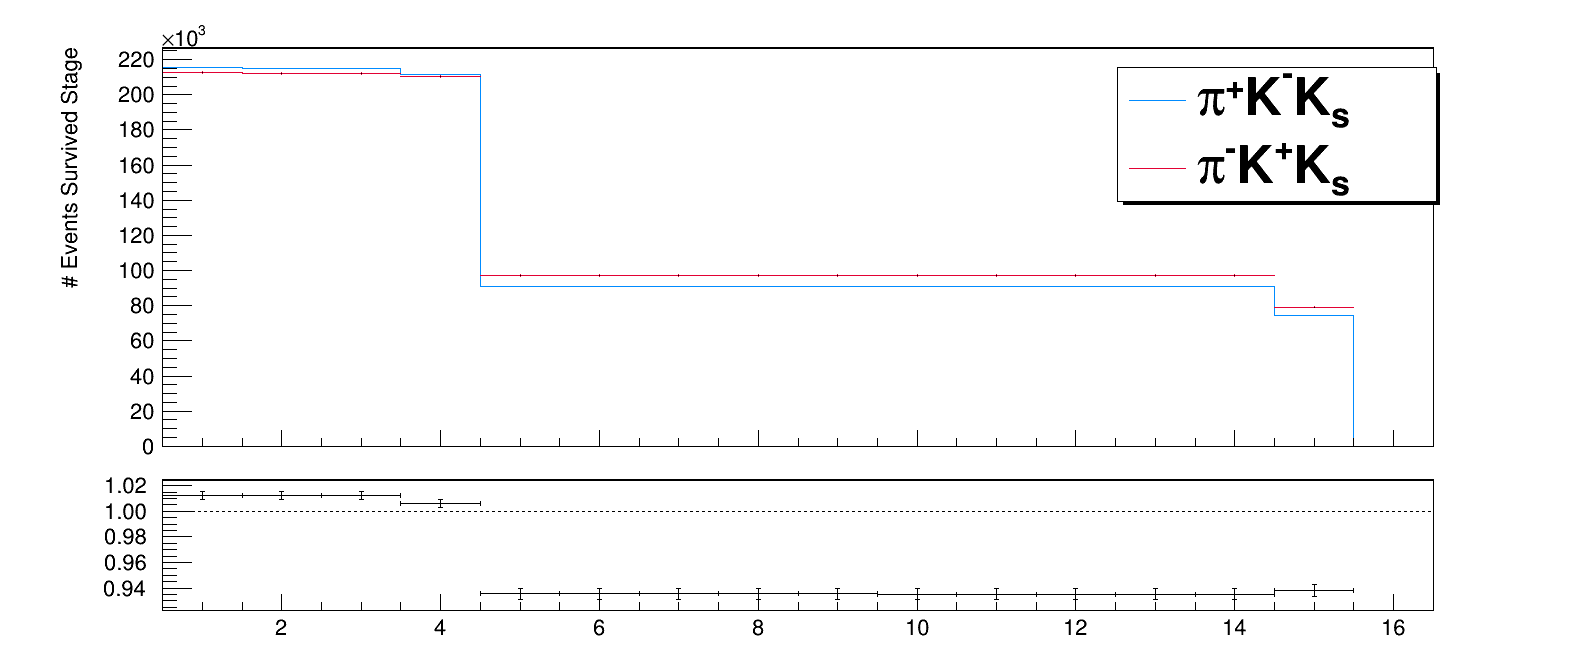

In [42]:
hist_pipkmks.GetXaxis().SetRangeUser(1, 20.0)
hist_pimkpks.GetXaxis().SetRangeUser(1, 20.0)

ratio_plot.RangeAxisChanged()

c1.cd()
ratio_plot.Draw()
legend.Draw()
c1.Draw()


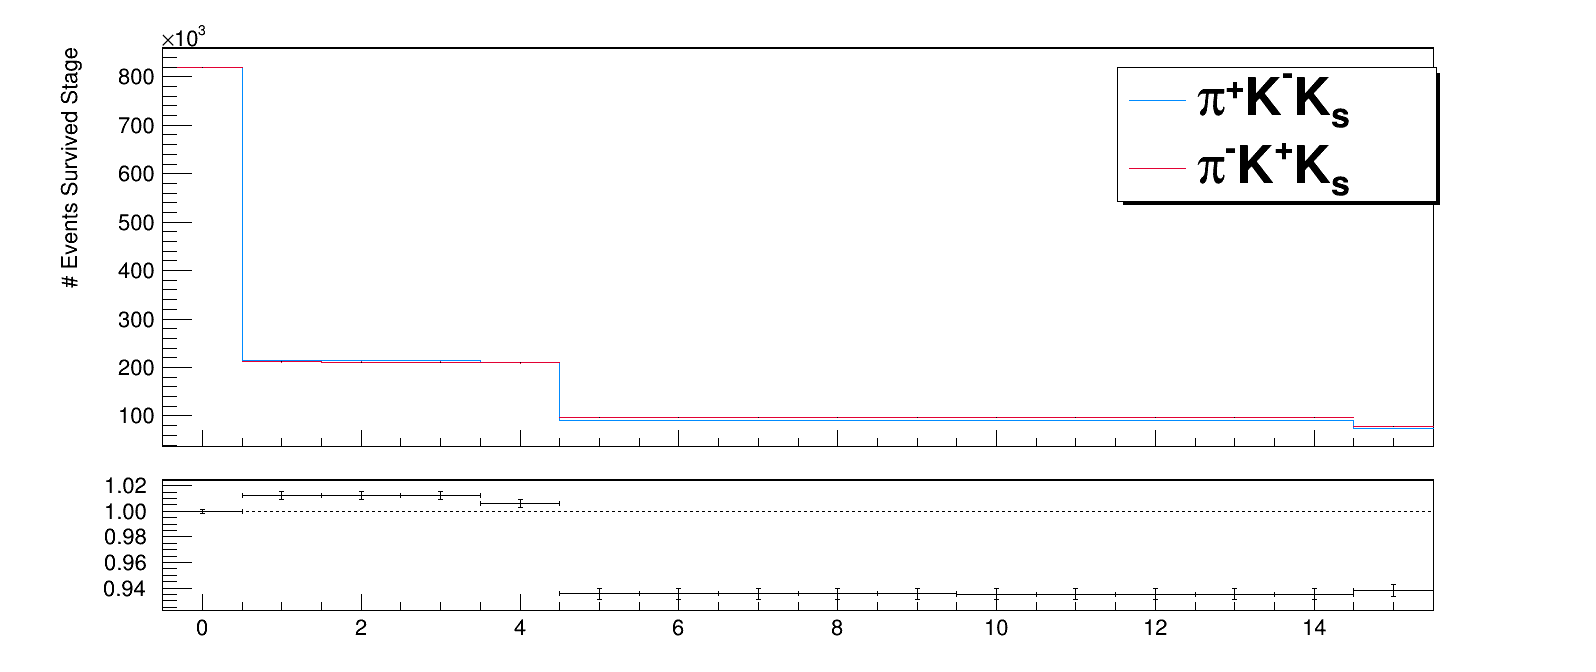

In [43]:
hist_pipkmks.GetXaxis().SetRangeUser(20, 35)
hist_pimkpks.GetXaxis().SetRangeUser(20, 35)
ratio_plot.RangeAxisChanged()

c1.cd()
ratio_plot.Draw()
legend.Draw()
c1.Draw()


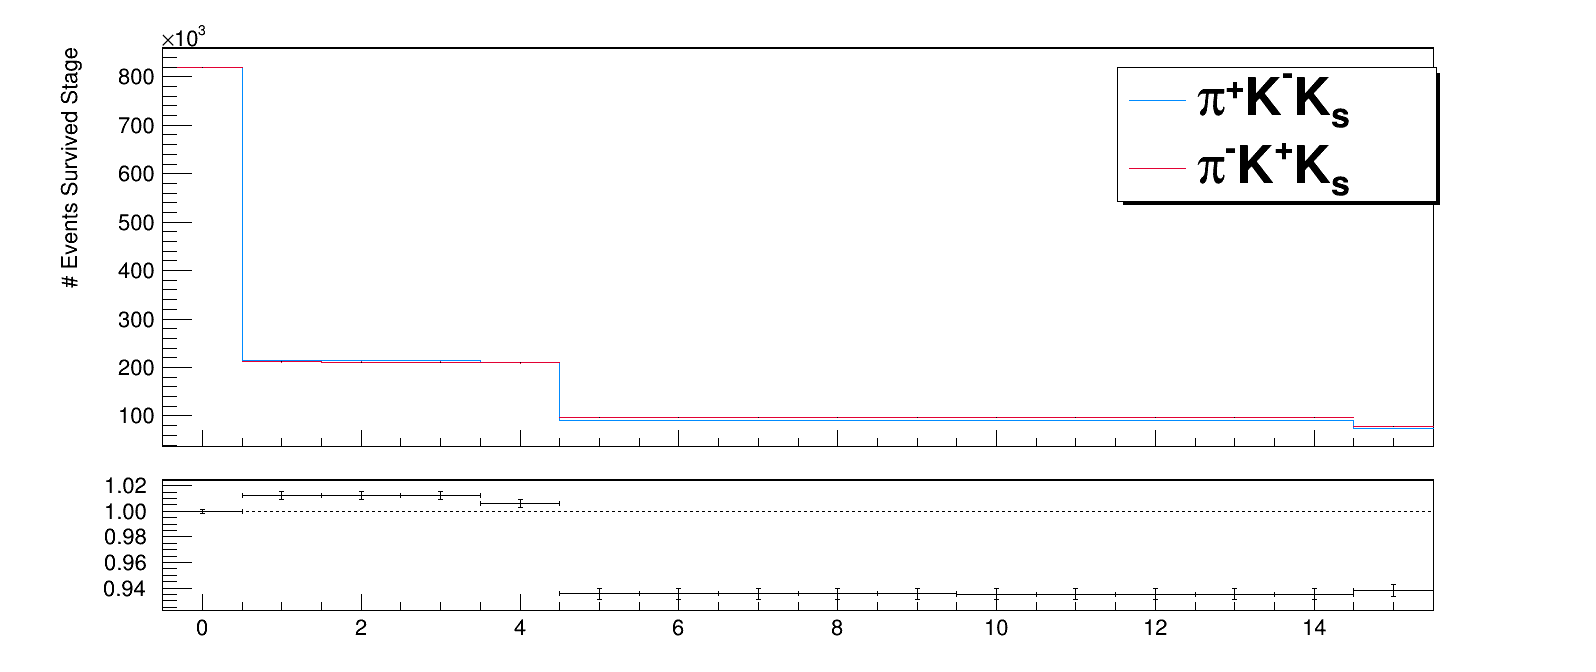

In [44]:
hist_pipkmks.GetXaxis().SetRangeUser(30, 34)
hist_pimkpks.GetXaxis().SetRangeUser(30, 34)
ratio_plot.RangeAxisChanged()

c1.cd()
ratio_plot.Draw()
legend.Draw()
c1.Draw()
